In [1]:
'''
 Logistic regression equation can be linear or non-linear.
 For this logistic regression model to predict heart disease 
 non-linear logistic regression equation is used which is as follows---
 ax3 + bx^2 + cx + d = 0 .... (i)
 for equation (i), the number of co-efficients we are going to use is 4 (a, b, c, d).
'''
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# dataset input and output
dataset = pd.read_csv("Heart_Disease_Prediction.csv")
dataset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [2]:
# extraction of input and output from dataset for easy calculation
# "Heart Disease" = output column
# all other columns are input columns

dataset_columns = dataset.columns.values.tolist()
input_columns   = np.setdiff1d(dataset_columns, ["Heart Disease"])
output_columns  = np.setdiff1d(dataset_columns, input_columns)

# real input
real_input  = dataset[input_columns]
# real output
real_output = dataset[output_columns]

In [3]:
real_input

,Age,BP,Chest pain type,Cholesterol,EKG results,Exercise angina,FBS over 120,Max HR,Number of vessels fluro,ST depression,Sex,Slope of ST,Thallium
0,70,130,4,322,2,0,0,109,3,2.4,1,2,3
1,67,115,3,564,2,0,0,160,0,1.6,0,2,7
2,57,124,2,261,0,0,0,141,0,0.3,1,1,7
3,64,128,4,263,0,1,0,105,1,0.2,1,2,7
4,74,120,2,269,2,1,0,121,1,0.2,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,3,199,0,0,1,162,0,0.5,1,1,7
266,44,120,2,263,0,0,0,173,0,0.0,1,1,7
267,56,140,2,294,2,0,0,153,0,1.3,0,2,3
268,57,140,4,192,0,0,0,148,0,0.4,1,2,6


In [4]:
# description of real_input(mean, standard deviation) etc.
real_input.describe()

,Age,BP,Chest pain type,Cholesterol,EKG results,Exercise angina,FBS over 120,Max HR,Number of vessels fluro,ST depression,Sex,Slope of ST,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,3.174074,249.659259,1.022222,0.329630,0.148148,149.677778,0.670370,1.05000,0.677778,1.585185,4.696296
std,9.109067,17.861608,0.950090,51.686237,0.997891,0.470952,0.355906,23.165717,0.943896,1.14521,0.468195,0.614390,1.940659
min,29.000000,94.000000,1.000000,126.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,1.000000,3.000000
25%,48.000000,120.000000,3.000000,213.000000,0.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,1.000000,3.000000
50%,55.000000,130.000000,3.000000,245.000000,2.000000,0.000000,0.000000,153.500000,0.000000,0.80000,1.000000,2.000000,3.000000
75%,61.000000,140.000000,4.000000,280.000000,2.000000,1.000000,0.000000,166.000000,1.000000,1.60000,1.000000,2.000000,7.000000
max,77.000000,200.000000,4.000000,564.000000,2.000000,1.000000,1.000000,202.000000,3.000000,6.20000,1.000000,3.000000,7.000000


In [5]:
real_output

,Heart Disease
0,Presence
1,Absence
2,Presence
3,Absence
4,Absence
...,...
265,Absence
266,Absence
267,Absence
268,Absence


In [6]:
# change output to numeric value i.e.
# 0 or 1 meaning no heart disease (Absence) or heart disease respectively.
real_output = real_output.replace(to_replace = {"Absence" : 0, "Presence" : 1})
real_output

,Heart Disease
0,1
1,0
2,1
3,0
4,0
...,...
265,0
266,0
267,0
268,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x07FFA330>,
      dtype=object)

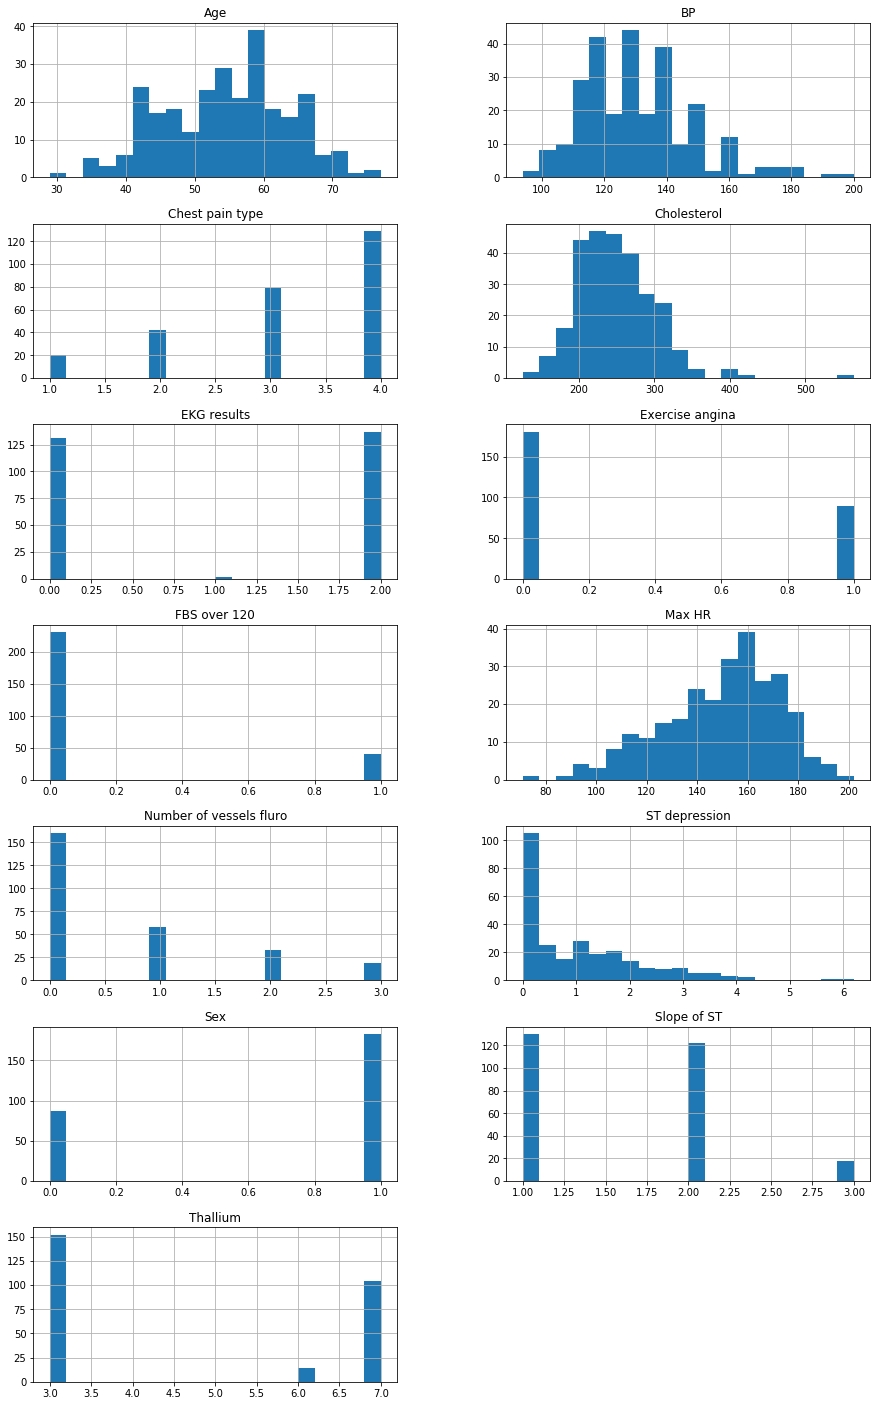

In [7]:
# We will work on outlier detection, data normalization for next several sessions. 

# histogram (data vs frequency)
real_input.hist(figsize  = (15, 25), layout = ((real_input.columns.size+1)//2, 2), bins = 20)

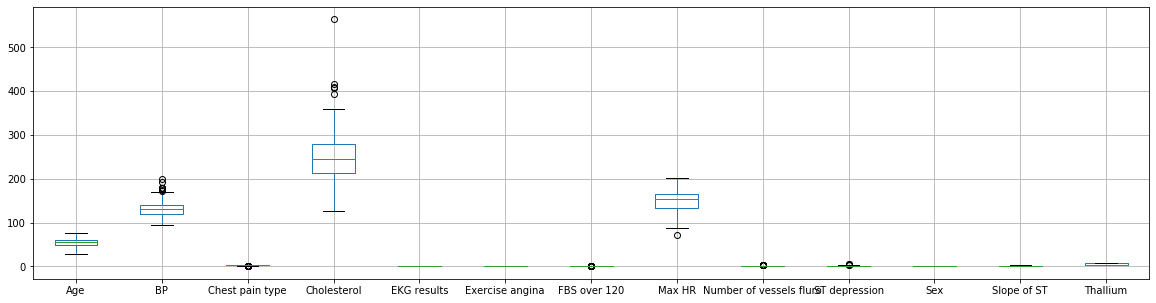

In [8]:
# boxplot.
# boxplot will tell us about outlier data and many more but to know about outlier data 
# boxplot is great.
# to know more about boxplot please visit the link below - 
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
real_input.boxplot(figsize = (20, 5))

In [9]:
# Now feature by feature, plot histogram and boxplot and normalize data

In [10]:
features = real_input.columns.values.tolist()
features

['Age',
 'BP',
 'Chest pain type',
 'Cholesterol',
 'EKG results',
 'Exercise angina',
 'FBS over 120',
 'Max HR',
 'Number of vessels fluro',
 'ST depression',
 'Sex',
 'Slope of ST',
 'Thallium']

In [11]:
# outlier detection

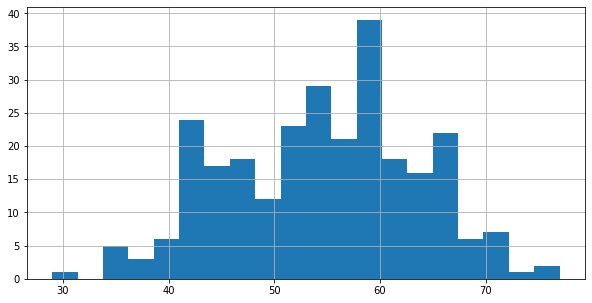

In [12]:
j = 0 
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

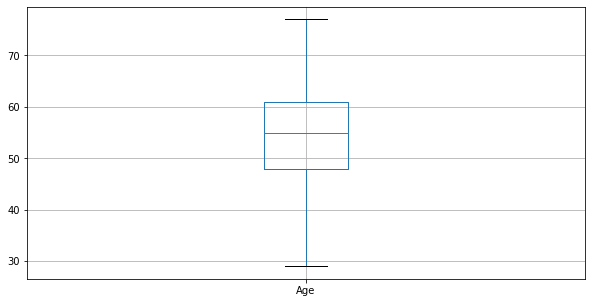

In [13]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [14]:
'''
For feature "Age",
boxplot seems ok but histogram seems having a very little irregular distribution.
Set "Age" < 40 = 40 and "Age" > 69 = 69
'''
real_input[feature] = real_input[feature].mask(real_input[feature] < 40, other = 40)
real_input[feature] = real_input[feature].mask(real_input[feature] > 69, other = 69)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [15]:
print("feature", feature, "details =")
real_input[feature].describe()

feature Age details =


count    270.000000
mean      54.503704
std        8.532356
min       40.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       69.000000
Name: Age, dtype: float64

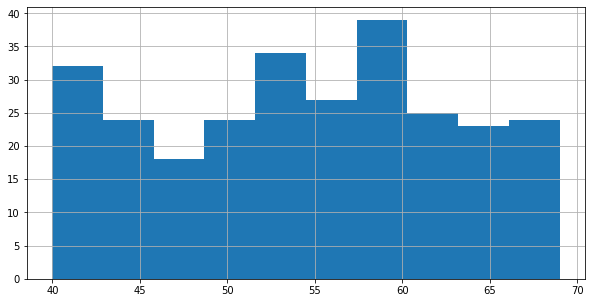

In [16]:
'''
Feature "Age" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

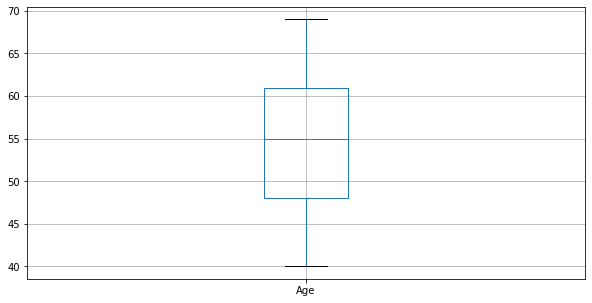

In [17]:
real_input.boxplot(column = feature, figsize = (10, 5))

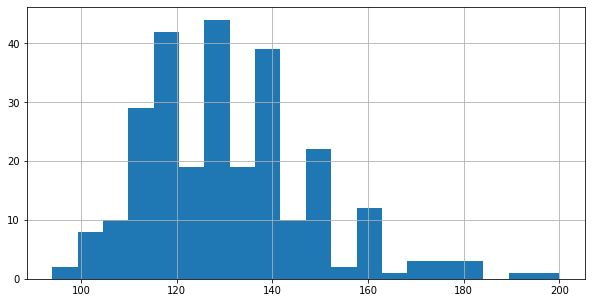

In [18]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

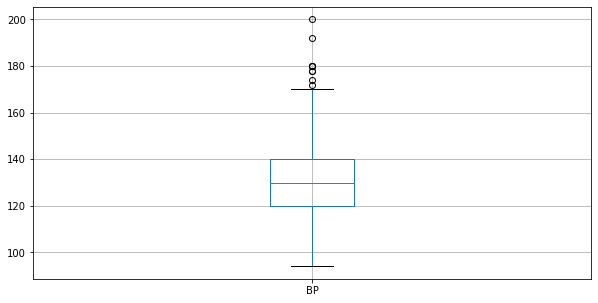

In [19]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [20]:
'''
For feature "BP",
Both histogram and outlier tell that "BP" is suffering from outliers. 
Set "BP" < 105 = 105 and "BP" > 170 = 170
'''
real_input[feature] = real_input[feature].mask(real_input[feature] < 110, other = 110)
real_input[feature] = real_input[feature].mask(real_input[feature] > 155, other = 155)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [21]:
print("feature", feature, "details =")
real_input[feature].describe()

feature BP details =


count    270.000000
mean     130.588889
std       14.282254
min      110.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      155.000000
Name: BP, dtype: float64

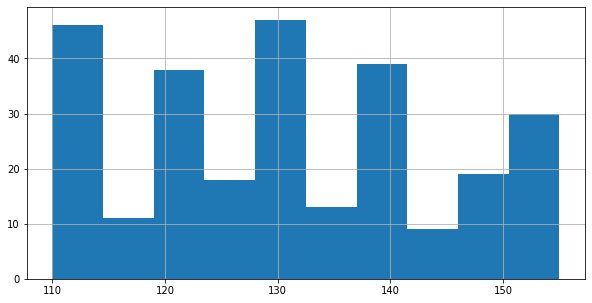

In [22]:
'''
Feature "BP" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

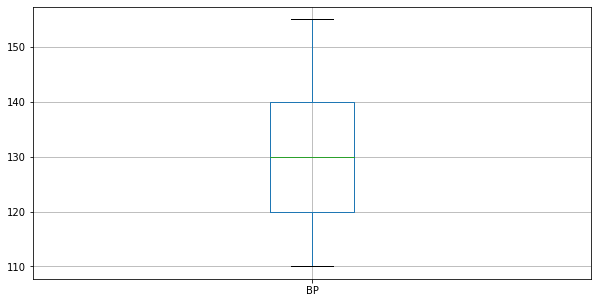

In [23]:
real_input.boxplot(column = feature, figsize = (10, 5))

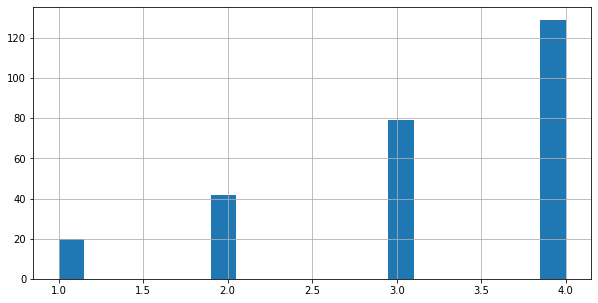

In [24]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

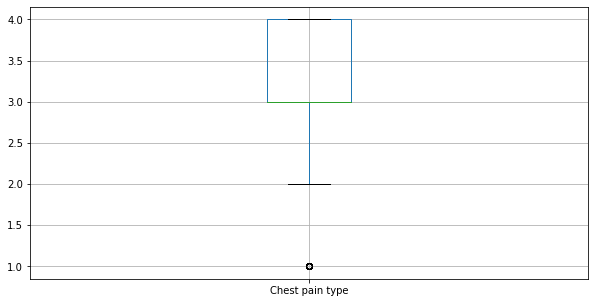

In [25]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [26]:
'''
For feature "Chest pain type",
Both histogram and outlier tell that feature is suffering from outliers from min value.
Set "Chest pain type" == 1 = 2 
'''
real_input[feature] = real_input[feature].mask(real_input[feature] == 1, other = 2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
print("feature", feature, "details =")
real_input[feature].describe()

feature Chest pain type details =


count    270.000000
mean       3.248148
std        0.805128
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Chest pain type, dtype: float64

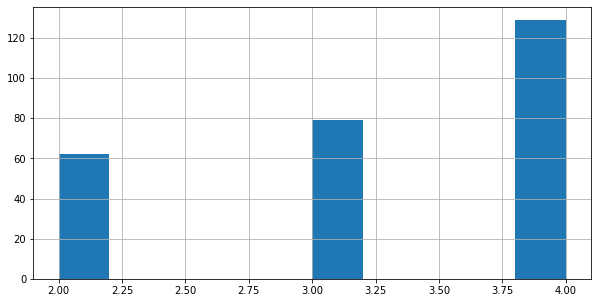

In [28]:
'''
Feature "Chest pain type" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

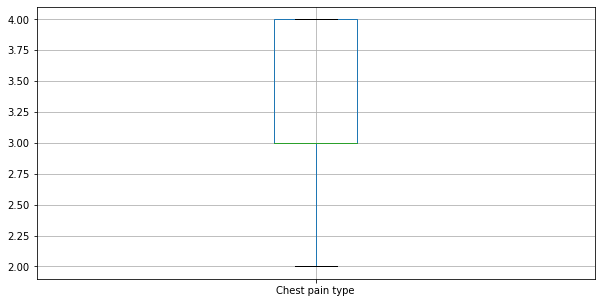

In [29]:
real_input.boxplot(column = feature, figsize = (10, 5))

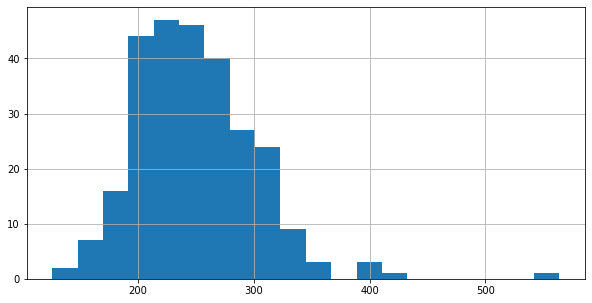

In [30]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

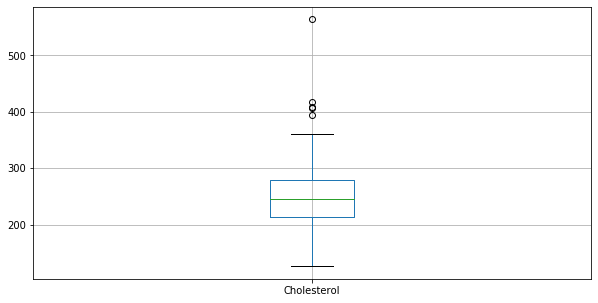

In [31]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [32]:
'''
For feature "Cholesterol",
Both histogram and outlier tell that the feature is suffering from extreme outliers. 
Set "Cholesterol" < 100 = 100 and "Cholesterol" > 340 = 340
'''
real_input[feature] = real_input[feature].mask(real_input[feature] < 160, other = 160)
real_input[feature] = real_input[feature].mask(real_input[feature] > 330, other = 330)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [33]:
print("feature", feature, "details =")
real_input[feature].describe()

feature Cholesterol details =


count    270.000000
mean     247.551852
std       43.877863
min      160.000000
25%      213.000000
50%      245.000000
75%      280.000000
max      330.000000
Name: Cholesterol, dtype: float64

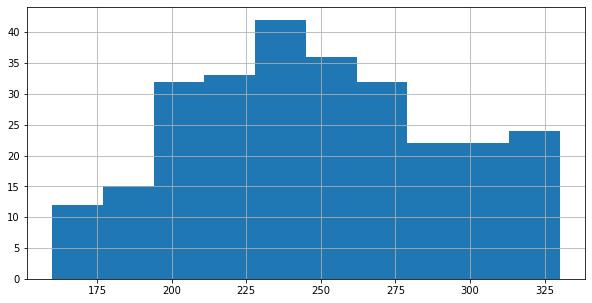

In [34]:
'''
Feature "Cholesterol" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

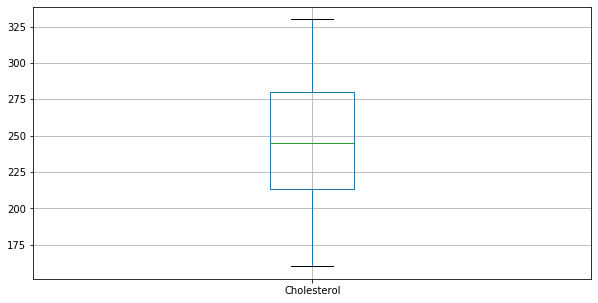

In [35]:
real_input.boxplot(column = feature, figsize = (10, 5))

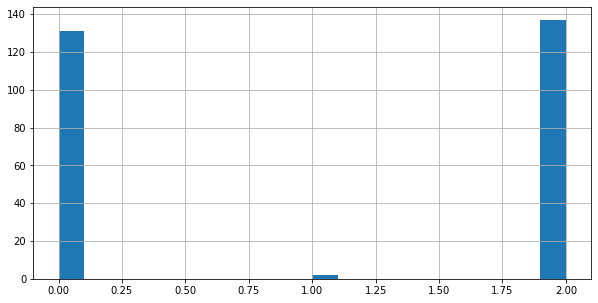

In [36]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

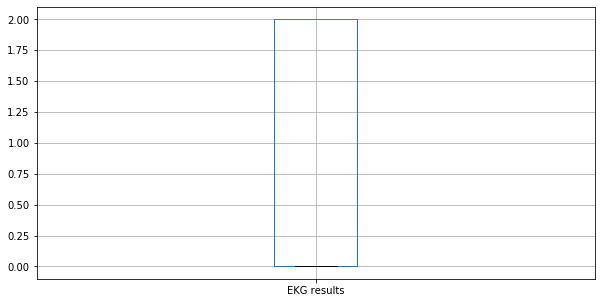

In [37]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [38]:
'''
For feature "EKG results",
Both histogram and boxplot seems little irregular.
Set "EKG results" <= 1 = 0
'''
real_input[feature] = real_input[feature].mask(real_input[feature] <= 1, other = 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
print("feature", feature, "details =")
real_input[feature].describe()

feature EKG results details =


count    270.000000
mean       1.014815
std        1.001747
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: EKG results, dtype: float64

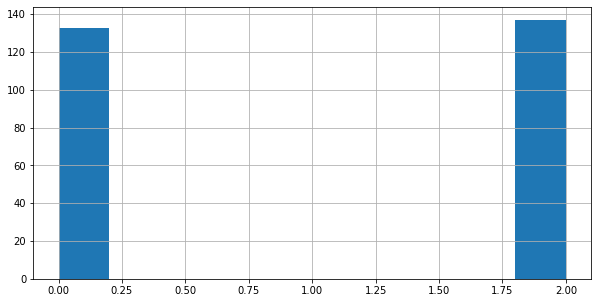

In [40]:
'''
Feature "EKG results" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

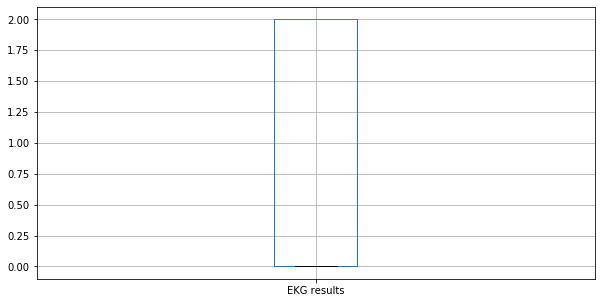

In [41]:
real_input.boxplot(column = feature, figsize = (10, 5))

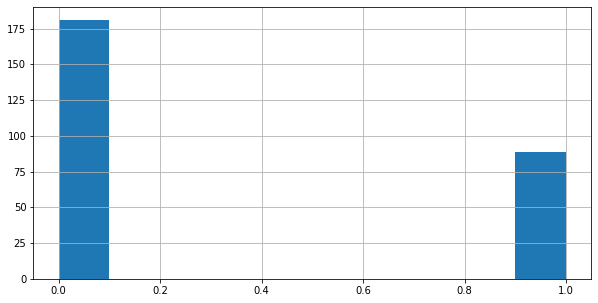

In [42]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 10)

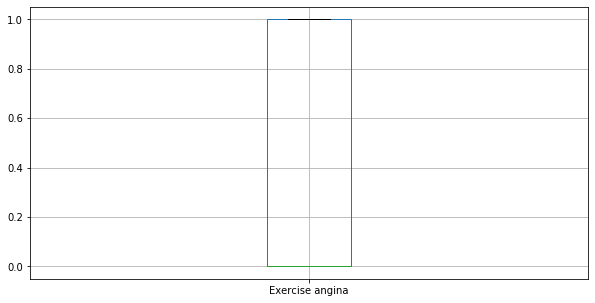

In [43]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [44]:
'''
For feature "Exercise angina",
Both histogram and boxplot seems ok. So leaving it as it is.
'''

'\nFor feature "Exercise angina",\nBoth histogram and boxplot seems ok. So leaving it as it is.\n'

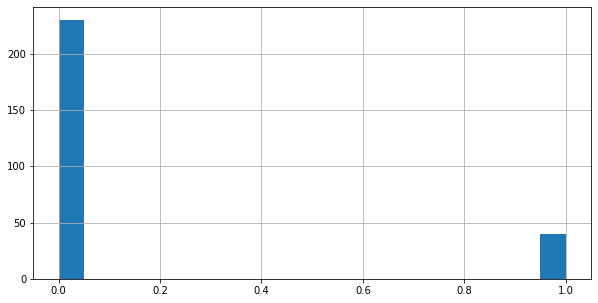

In [45]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

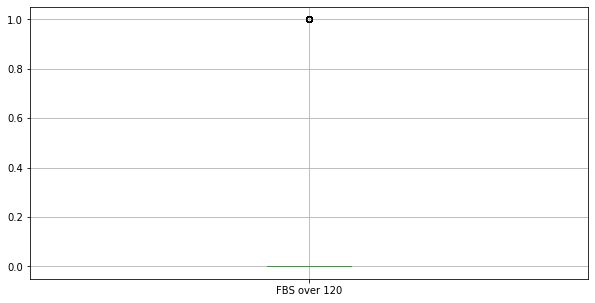

In [46]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [47]:
'''
For feature "FBS over 120",
Both histogram and boxplot seems suffering from extreme outlier from max value.
Set "FBS over 120" == 1 = 0
'''
real_input[feature] = real_input[feature].mask(real_input[feature] == 1, other = 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
print("feature", feature, "details =")
real_input[feature].describe()

feature FBS over 120 details =


count    270.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: FBS over 120, dtype: float64

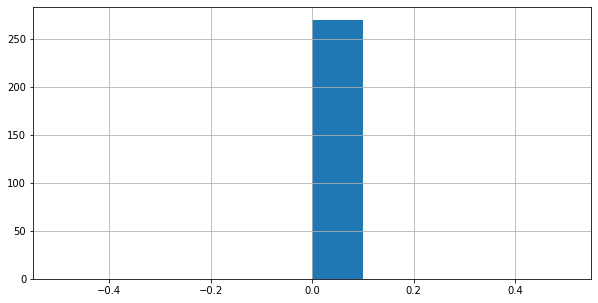

In [49]:
'''
Feature "FBS over 120" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

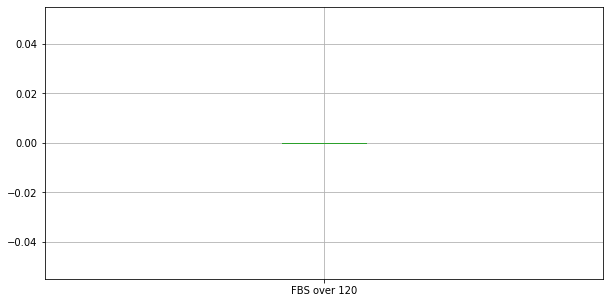

In [50]:
real_input.boxplot(column = feature, figsize = (10, 5))

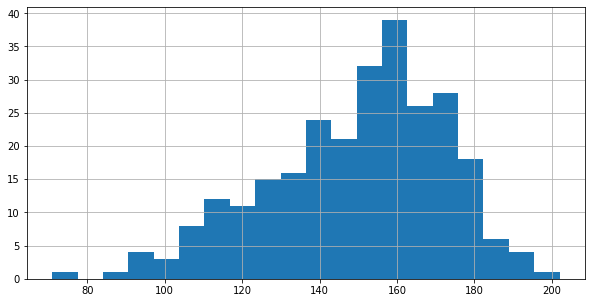

In [51]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

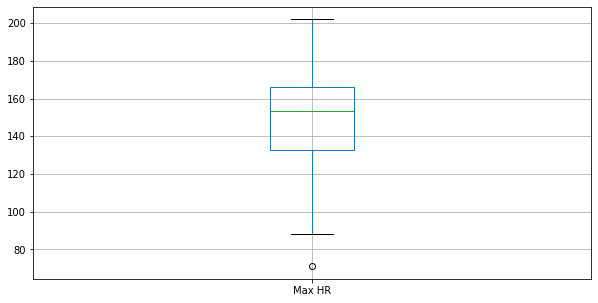

In [52]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [53]:
'''
    For feature "Max HR",
histogram seems to be suffering from a little outlier.
Set "Max HR" < 100 = 100 and "Max HR" > 180 = 180
'''
real_input[feature] = real_input[feature].mask(real_input[feature] < 100, other = 100)
real_input[feature] = real_input[feature].mask(real_input[feature] > 185, other = 185)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [54]:
print("feature", feature, "details =")
real_input[feature].describe()

feature Max HR details =


count    270.000000
mean     149.688889
std       22.243989
min      100.000000
25%      133.000000
50%      153.500000
75%      166.000000
max      185.000000
Name: Max HR, dtype: float64

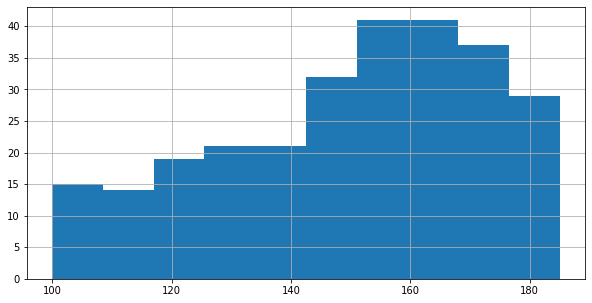

In [55]:
'''
Feature "Max HR" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

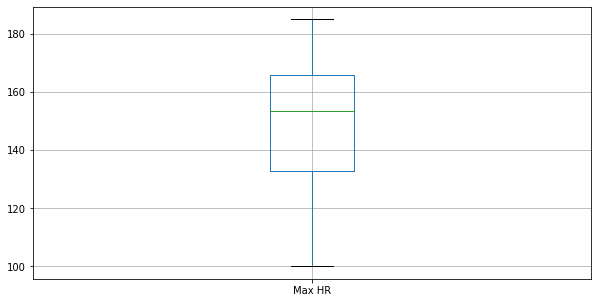

In [56]:
real_input.boxplot(column = feature, figsize = (10, 5))

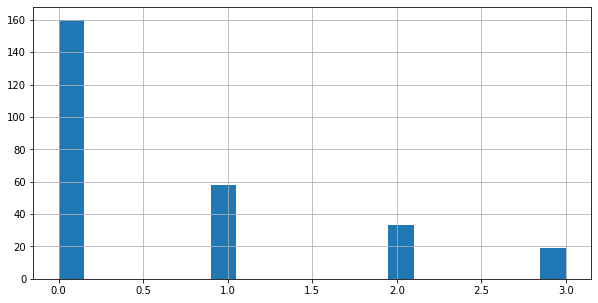

In [57]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

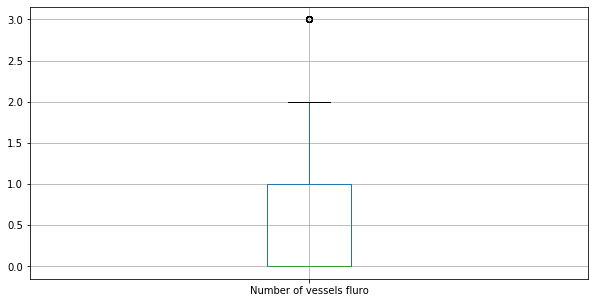

In [58]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [59]:
'''
For feature "Number of vessels fluro",
Both histogram and outlier tell that feature is suffering from outliers from max value.
Set "Number of vessels fluro" == 3 = 2 
'''
real_input[feature] = real_input[feature].mask(real_input[feature] > 1, other = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
print("feature", feature, "details =")
real_input[feature].describe()

feature Number of vessels fluro details =


count    270.000000
mean       0.407407
std        0.492264
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Number of vessels fluro, dtype: float64

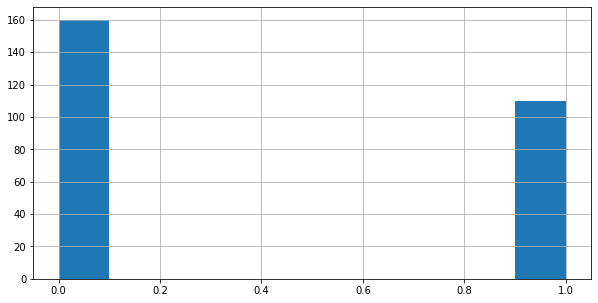

In [61]:
'''
Feature "Number of vessels fluro" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

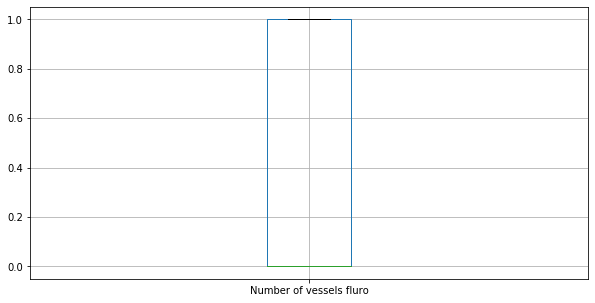

In [62]:
real_input.boxplot(column = feature, figsize = (10, 5))

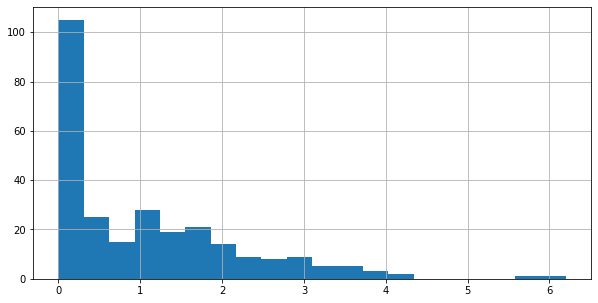

In [63]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

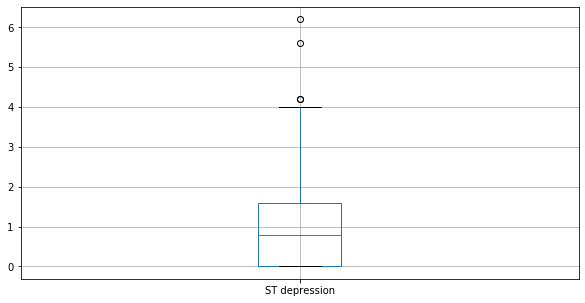

In [64]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [65]:
'''
    For feature "ST depression",
histogram seems to be suffering from outlier from max value.
Set "ST depression" > 4 = 4
'''
real_input[feature] = real_input[feature].mask(real_input[feature] > 2.25, other = 2.25)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
print("feature", feature, "details =")
real_input[feature].describe()

feature ST depression details =


count    270.000000
mean       0.913148
std        0.856336
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        2.250000
Name: ST depression, dtype: float64

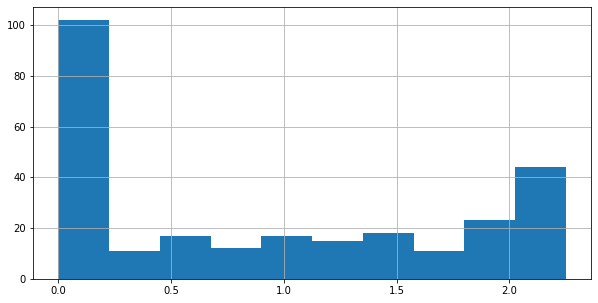

In [67]:
'''
Feature "ST depression" is now well distributed.
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

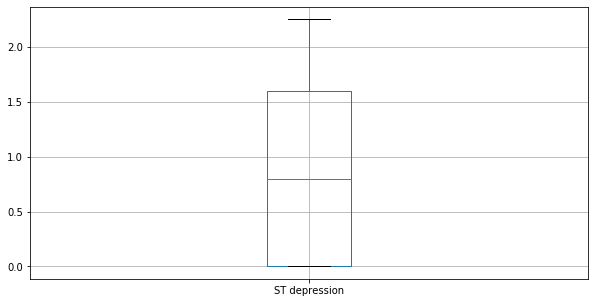

In [68]:
real_input.boxplot(column = feature, figsize = (10, 5))

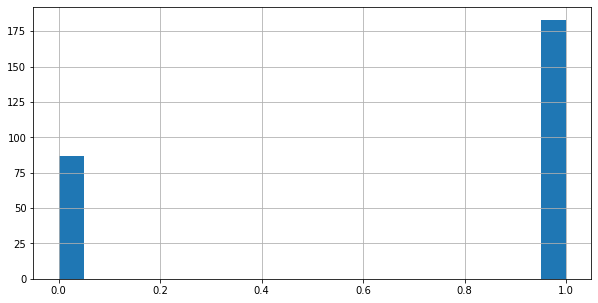

In [69]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

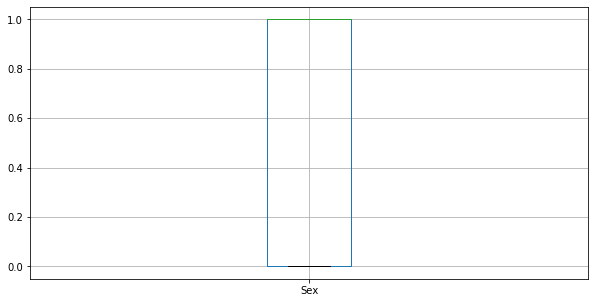

In [70]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [71]:
'''
For feature "Sex",
Both histogram and boxplot shows that the feature is well distributed. so leaving it as it is.
'''

'\nFor feature "Sex",\nBoth histogram and boxplot shows that the feature is well distributed. so leaving it as it is.\n'

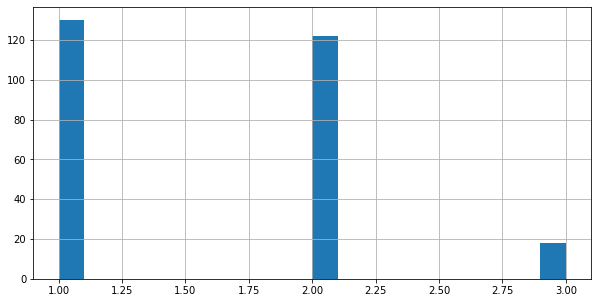

In [72]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

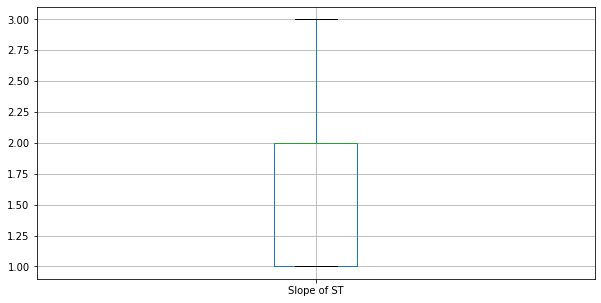

In [73]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [74]:
'''
For feature "Slope of ST",
Both histogram and boxplot seems little irregular.
Set "Slope of ST" > 2 = 2.
'''
real_input[feature] = real_input[feature].mask(real_input[feature] > 2, other = 2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
print("feature", feature, "details =")
real_input[feature].describe()

feature Slope of ST details =


count    270.000000
mean       1.518519
std        0.500585
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Slope of ST, dtype: float64

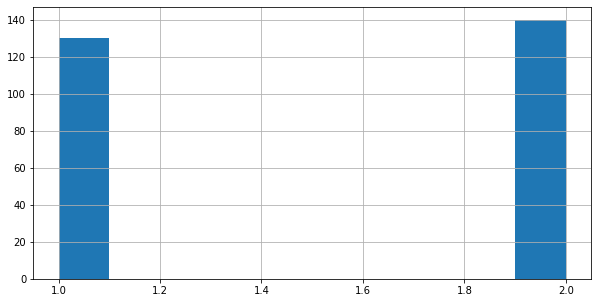

In [76]:
'''
Feature "Slope of ST" is now well distributed.
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

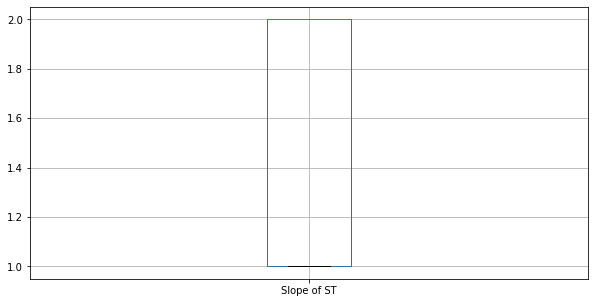

In [77]:
real_input.boxplot(column = feature, figsize = (10, 5))

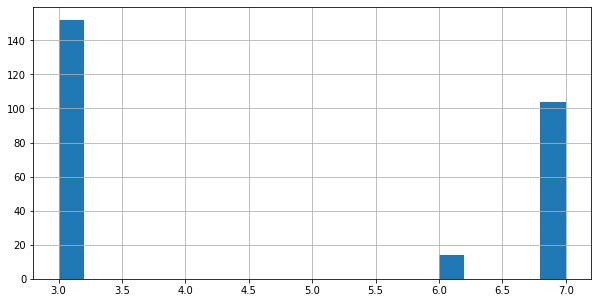

In [78]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

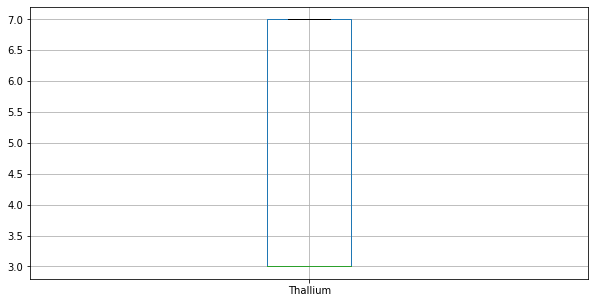

In [79]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [80]:
'''
For feature "Thallium",
Both histogram and boxplot seems little irregular.
Set "Thallium" >= 6 = 7
'''
real_input[feature] = real_input[feature].mask(real_input[feature] >= 6, other = 7)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
print("feature", feature, "details =")
real_input[feature].describe()

feature Thallium details =


count    270.000000
mean       4.748148
std        1.987764
min        3.000000
25%        3.000000
50%        3.000000
75%        7.000000
max        7.000000
Name: Thallium, dtype: float64

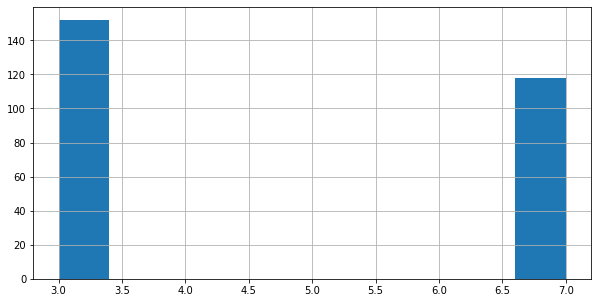

In [82]:
'''
Feature "Slope of ST" is now well distributed.
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

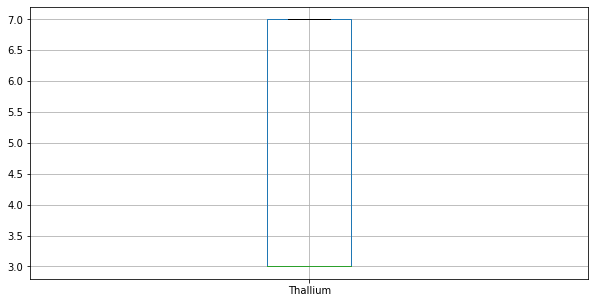

In [83]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [84]:
# data normalization 

In [85]:
'''    
There are a number of techniques to normalize data such as-
min-max normalization, feature clipping, log scaling, z-score etc.
more information available at -
https://developers.google.com/machine-learning/data-prep/transform/normalization
'''
# min-max equation -
# X = (X - Xmin) / (Xmax - Xmin)
real_input = (real_input - np.min(real_input)) / (np.max(real_input) - np.min(real_input))
real_input

,Age,BP,Chest pain type,Cholesterol,EKG results,Exercise angina,FBS over 120,Max HR,Number of vessels fluro,ST depression,Sex,Slope of ST,Thallium
0,1.000000,0.444444,1.0,0.952941,1.0,0.0,NaN,0.105882,1.0,1.000000,1.0,1.0,0.0
1,0.931034,0.111111,0.5,1.000000,1.0,0.0,NaN,0.705882,0.0,0.711111,0.0,1.0,1.0
2,0.586207,0.311111,0.0,0.594118,0.0,0.0,NaN,0.482353,0.0,0.133333,1.0,0.0,1.0
3,0.827586,0.400000,1.0,0.605882,0.0,1.0,NaN,0.058824,1.0,0.088889,1.0,1.0,1.0
4,1.000000,0.222222,0.0,0.641176,1.0,1.0,NaN,0.247059,1.0,0.088889,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.413793,1.000000,0.5,0.229412,0.0,0.0,NaN,0.729412,0.0,0.222222,1.0,0.0,1.0
266,0.137931,0.222222,0.0,0.605882,0.0,0.0,NaN,0.858824,0.0,0.000000,1.0,0.0,1.0
267,0.551724,0.666667,0.0,0.788235,1.0,0.0,NaN,0.623529,0.0,0.577778,0.0,1.0,0.0
268,0.586207,0.666667,1.0,0.188235,0.0,0.0,NaN,0.564706,0.0,0.177778,1.0,1.0,1.0


In [86]:
'''
From above we see that, feature "FBS over 120" value = NaN. 
Because earlier in outlier detection, the feature value is set to 0 to overcome outliers.
So the feature will have no impact on prediction and it is unnecessary to keep this feature.
'''
del real_input["FBS over 120"]
real_input

,Age,BP,Chest pain type,Cholesterol,EKG results,Exercise angina,Max HR,Number of vessels fluro,ST depression,Sex,Slope of ST,Thallium
0,1.000000,0.444444,1.0,0.952941,1.0,0.0,0.105882,1.0,1.000000,1.0,1.0,0.0
1,0.931034,0.111111,0.5,1.000000,1.0,0.0,0.705882,0.0,0.711111,0.0,1.0,1.0
2,0.586207,0.311111,0.0,0.594118,0.0,0.0,0.482353,0.0,0.133333,1.0,0.0,1.0
3,0.827586,0.400000,1.0,0.605882,0.0,1.0,0.058824,1.0,0.088889,1.0,1.0,1.0
4,1.000000,0.222222,0.0,0.641176,1.0,1.0,0.247059,1.0,0.088889,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.413793,1.000000,0.5,0.229412,0.0,0.0,0.729412,0.0,0.222222,1.0,0.0,1.0
266,0.137931,0.222222,0.0,0.605882,0.0,0.0,0.858824,0.0,0.000000,1.0,0.0,1.0
267,0.551724,0.666667,0.0,0.788235,1.0,0.0,0.623529,0.0,0.577778,0.0,1.0,0.0
268,0.586207,0.666667,1.0,0.188235,0.0,0.0,0.564706,0.0,0.177778,1.0,1.0,1.0


In [87]:
# data manipulation for easy calculation

In [88]:
coefficients = np.zeros((1, 4)) # co-efficients (a,b,c,d) of logit eq - ax3 + bx2 + cx + d = y

In [89]:
real_input = np.array(real_input, dtype = np.float64)
real_input = np.sum(real_input, axis = 1, keepdims = True) #/ j
# N.B. j is the column length is used earlier in outlier detection
real_input = real_input**np.arange(start = coefficients.size-1, stop  = -1, step  = -1) 
real_input

array([[614.8336057 ,  72.30556624,   8.50326797,   1.        ],
       [337.02843524,  48.42961643,   6.95913906,   1.        ],
       [ 69.28078313,  16.86845054,   4.10712193,   1.        ],
       ...,
       [141.25253066,  27.12256913,   5.20793329,   1.        ],
       [236.44089192,  38.23681642,   6.18359252,   1.        ],
       [839.36112231,  88.98139971,   9.43299527,   1.        ]])

In [90]:
real_output = np.array(real_output)
real_output

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [91]:
# declaration for graph plot
epoches = 500000 # iterations 
it = [i for i in range(epoches)]
cost = [] # cost is nothing but a measure to determine error between real output and
          # predicted output i.e. sum of square errors

In [92]:
# numpy array declaration for sum of square erros (sse), 
# derivative of sse (dsse) and co-efficients (c)
sse              = np.array([[]], dtype = np.float64)
dsse             = np.array([[]], dtype = np.float64)
predicted_output = np.zeros((1, 1))

In [93]:
# logistic function and its derivative function declaration--
# Another name of logistic function is sigmoid function
# Sigmoid function covert any value in (0,1] .
# We will assume predicted output >= 0.5 belongs to group 1 i.e. heart disease
# and predicted output < 0.5 belongs to group 0 i.e. no heart disease
'''
sigmoid function:
                      1
                  ----------
                  1 + e^(-x) 
                  
derivative of sigmoid function:
d   /     1      \         e^-(x)           1          e^-(x)                 e^(-x)
-- |  ----------  | =  -------------- = ---------- * ---------- = sigmoid * ----------
dx  \ 1 + e^(-x) /     {1 + e^(-x)}^2   1 + e^(-x)   1 + e^(-x)             1 + e^(-x) 

                                1 + e^(-x) - 1              / 1 + e^(-x)       1      \
                    = sigmoid * -------------- = sigmoid * |  ---------- - ----------  |
                                  1 + e^(-x)                \ 1 + e^(-x)   1 + e^(-x) /

                    = sigmoid * (1 - sigmoid)
'''
def sig(x):
    return 1 / (1 + np.exp(-x))

def dsig(x): # dsig means derivative of sigmoid function
    return x * (1 - x) # sigmoid * (1 - sigmoid)

In [94]:
# feed-forward and backpropagation function declaration

def feed_forward(real_input, real_output):
    global cost, sse, dsse, coefficients, predicted_output
    predicted_net_output = np.sum(coefficients * real_input, axis = 1, keepdims = True)
    predicted_output     = sig(predicted_net_output)
    sse                  = 0.5 * (predicted_output - real_output)**2
    dsse                 =       (predicted_output - real_output)
    cost.append(np.sum(sse))
    return 0 

def back_propagation(real_input, real_output):
    global predicted_output, coefficients
    n = .001 # learning rate
    # gradient descent calculation
    grad_coefficients = np.sum(dsse * dsig(predicted_output) * real_input, axis = 0,\
                               keepdims = True) / real_output.size 
    # update coefficients
    coefficients -= n * grad_coefficients
    return 0

In [95]:
for _ in range(epoches):
    # calculating output, sse and dsse for regression equation
    feed_forward(real_input, real_output) 
    # gradient descent calculation and update co-efficients and constants
    back_propagation(real_input, real_output) 

In [96]:
# printing updated values and values based on different criteria
print("Co-efficients =\n", *coefficients)
print("Real Output =\n", *real_output)
thresholded_predicted_output = np.where(predicted_output >= 0.5 , 1, 0)
print("Predicted Output after thresholded =\n", *thresholded_predicted_output)
value_not_matched = np.sum(np.abs(real_output - thresholded_predicted_output))
print("Value not matched = ", int(value_not_matched))
accuracy = (real_output.size - value_not_matched) / real_output.size
print("Accuracy = ", accuracy * 100, "%")

Co-efficients =
 [ 0.00265569  0.14136219 -0.93686101 -0.75393634]
Real Output =
 [1] [0] [1] [0] [0] [0] [1] [1] [1] [1] [0] [0] [0] [1] [0] [0] [1] [1] [0] [0] [1] [0] [0] [0] [0] [0] [0] [0] [1] [0] [1] [0] [0] [1] [1] [1] [1] [1] [0] [0] [1] [0] [0] [0] [1] [0] [1] [1] [1] [1] [1] [0] [0] [0] [0] [0] [1] [0] [1] [1] [0] [1] [0] [0] [0] [1] [0] [1] [0] [1] [1] [0] [0] [0] [0] [1] [0] [0] [0] [0] [1] [1] [1] [0] [0] [0] [0] [0] [0] [1] [0] [1] [1] [1] [1] [1] [0] [1] [0] [0] [0] [1] [0] [1] [1] [1] [0] [1] [1] [0] [1] [0] [1] [0] [0] [0] [1] [1] [0] [1] [1] [1] [1] [0] [0] [0] [1] [0] [0] [1] [1] [1] [0] [1] [0] [0] [0] [1] [0] [0] [1] [0] [1] [0] [1] [1] [1] [1] [1] [0] [0] [0] [0] [0] [0] [0] [1] [0] [0] [1] [1] [1] [0] [1] [0] [0] [0] [0] [0] [1] [0] [1] [1] [0] [0] [1] [1] [1] [1] [0] [0] [1] [1] [0] [0] [0] [1] [0] [0] [1] [0] [1] [0] [1] [0] [0] [0] [0] [0] [1] [0] [1] [1] [1] [1] [0] [0] [0] [1] [0] [1] [0] [0] [1] [0] [0] [0] [0] [0] [0] [1] [1] [0] [1] [0] [0] [1] [1] [0] [0

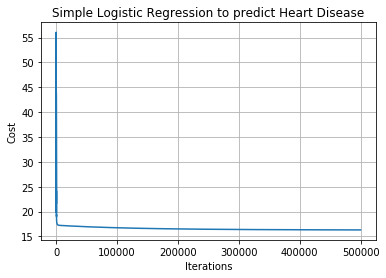

In [97]:
# graph plot
plt.plot(it, cost)
plt.grid(True)
plt.title("Simple Logistic Regression to predict Heart Disease")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()       